Goal of the exercise is to cleanup & explore data from the Craigslists auto sales classifields. 
Data is sourced from Kaggle from the following link:
https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Still a WIP...

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load in the data & create Pandas dataframe
cz_df = pd.read_csv('craigslist-carstrucks-data-v2/craigslistVehiclesFull.csv')

In [5]:
cz_df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


The raw dataset contains many statistical outliers in regards to highly unregulated craigslist postings. Price, year & odometer minimums & maximums reflect seller misinformation. 

In [6]:
cz_df.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.723065e+06,1.716750e+06,1.159011e+06,1.723065e+06,1.723065e+06,1.664232e+06,1.664232e+06,1.663637e+06
mean,1.075540e+05,2.004841e+03,1.136387e+05,3.878195e+01,-9.371198e+01,2.843053e+04,2.834410e+01,5.378706e+01
std,1.004439e+07,1.208772e+01,1.368603e+05,5.976412e+00,1.696519e+01,1.605423e+04,1.603224e+01,7.799381e+00
min,1.000000e+00,3.020000e+02,0.000000e+00,-8.481005e+01,-1.000000e+03,1.001000e+03,1.000000e+00,2.900000e+01
25%,3.295000e+03,2.002000e+03,5.800000e+04,3.491900e+01,-1.058010e+02,1.212300e+04,1.200000e+01,4.800000e+01
50%,7.000000e+03,2.007000e+03,1.070000e+05,3.940989e+01,-8.824070e+01,2.902100e+04,2.900000e+01,5.300000e+01
75%,1.499900e+04,2.012000e+03,1.520000e+05,4.255459e+01,-8.102650e+01,4.106700e+04,4.100000e+01,5.900000e+01
max,2.068627e+09,2.019000e+03,1.000000e+07,9.000000e+01,1.397061e+02,5.604500e+04,5.600000e+01,7.900000e+01


In [7]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


In [8]:
#Drop fields that will not be used for analysis
cz_dropped = cz_df.drop(columns=['url','city','fuel','vin','size','image_url','lat','long','county_fips','county_name','state_fips','state_code','state_name','weather'])

In [9]:
#Craigslist has many duplicate listings from buyers/bots attempting to sell vehicles
clean_duplicates = cz_dropped.drop_duplicates(subset = cz_dropped.columns.difference(['city']),keep = 'last')

In [10]:
clean_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295627 entries, 1 to 1723064
Data columns (total 12 columns):
price           1295627 non-null int64
year            1290077 non-null float64
manufacturer    1184478 non-null object
make            1241194 non-null object
condition       816598 non-null object
cylinders       808206 non-null object
odometer        855050 non-null float64
title_status    1293788 non-null object
transmission    1290449 non-null object
drive           807320 non-null object
type            762614 non-null object
paint_color     790481 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 128.5+ MB


In [11]:
#Would only like to look at vehicles with title status & odometer readings
clean_df = clean_duplicates[clean_duplicates['title_status'].notnull() == True][clean_duplicates['odometer'].notnull() == True]

/home/kenneth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854244 entries, 4 to 1723064
Data columns (total 12 columns):
price           854244 non-null int64
year            850122 non-null float64
manufacturer    804056 non-null object
make            833809 non-null object
condition       614959 non-null object
cylinders       626618 non-null object
odometer        854244 non-null float64
title_status    854244 non-null object
transmission    850474 non-null object
drive           644914 non-null object
type            624577 non-null object
paint_color     632381 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 84.7+ MB


Force relevant string fields to lowercase to enable consistent, searchable format

In [14]:
clean_df['manufacturer'] = clean_df['manufacturer'].str.lower()

In [15]:
clean_df['make'] = clean_df['make'].str.lower()

Outliers in price, year, & mileage will be removed.

In [18]:
#remove outliers, misleading ads with incorrect sales price
clean_df.price.quantile(q = 0.999)

108971.77500000747

In [19]:
#Filter for year > 1979,  $500 > price < $300,000, odometer <300,000 miles
clean_df = clean_df[(clean_df['year'] > 1979) & (clean_df['year'] < 2020) & (clean_df['price'] < clean_df['price'].quantile(.999)) & (clean_df['price'] > 500) & (clean_df['odometer']<300000)]

In [20]:
clean_df.describe()

,price,year,odometer
count,807127.000000,807127.000000,807127.000000
mean,11276.261666,2007.448234,111655.681769
std,10493.030846,6.698509,63743.711122
min,502.000000,1980.000000,0.000000
25%,3900.000000,2004.000000,62048.000000
50%,7900.000000,2008.000000,111800.000000
75%,15500.000000,2013.000000,156000.000000
max,108915.000000,2019.000000,299999.000000


In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807127 entries, 7 to 1723064
Data columns (total 12 columns):
price           807127 non-null int64
year            807127 non-null float64
manufacturer    764808 non-null object
make            788929 non-null object
condition       577213 non-null object
cylinders       590548 non-null object
odometer        807127 non-null float64
title_status    807127 non-null object
transmission    803417 non-null object
drive           609381 non-null object
type            590276 non-null object
paint_color     596654 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 80.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f2b082e10>]],
      dtype=object)

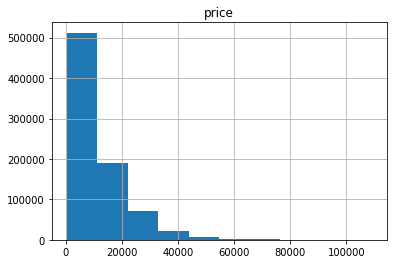

In [22]:
clean_df.hist('price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f2b021048>,
      dtype=object)

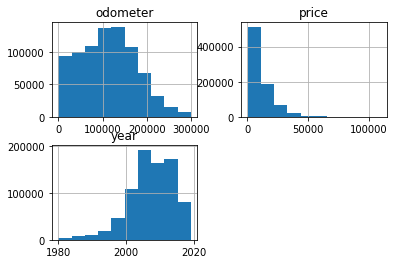

In [23]:
clean_df.hist()

Text(0.5, 1.0, 'Price Density Plot')

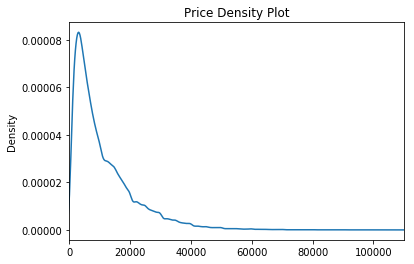

In [29]:
clean_df.price.plot.density()
plt.xlim(0,110000)
plt.title('Price Density Plot')

The BMW M3 is my personal favorite series of cars (DUH)...I would like to dive in and take a look at whats available from the Craigslist dataset

In [25]:
bmw_m3 = clean_df[(clean_df['manufacturer'] == 'bmw') & (clean_df['make'] == 'm3')]

In [26]:
bmw_m3.head()

,price,year,manufacturer,make,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color
8281,23250,2009.0,bmw,m3,NaN,8 cylinders,65250.0,lien,other,rwd,coupe,black
8851,16000,2011.0,bmw,m3,excellent,8 cylinders,65000.0,missing,manual,rwd,convertible,black
13170,29000,2006.0,bmw,m3,excellent,6 cylinders,97451.0,clean,manual,rwd,coupe,black
15469,30000,2012.0,bmw,m3,NaN,NaN,46300.0,clean,automatic,NaN,NaN,NaN
42881,12500,2003.0,bmw,m3,excellent,NaN,102600.0,clean,automatic,rwd,convertible,silver


In [27]:
bmw_m3.describe()

,price,year,odometer
count,462.000000,462.000000,462.000000
mean,21227.413420,2005.378788,91841.194805
std,14638.153079,6.247726,55539.682985
min,509.000000,1988.000000,0.000000
25%,10500.000000,2002.000000,52711.250000
50%,16999.500000,2004.500000,87935.500000
75%,27995.000000,2010.750000,128693.000000
max,79500.000000,2018.000000,288000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f29467128>,
      dtype=object)

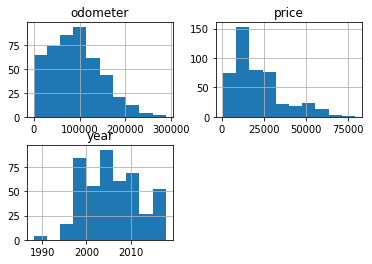

In [28]:
bmw_m3.hist()

Still a WIP...